# Instalando dependências

In [ ]:
!pip install python-telegram-bot requests matplotlib

'''
python-telegram-bot: biblioteca para criação de bots escritos em python
para o Telegram telegram.

requests: biblioteca específica para fazer requisições
(pedidos de dados externos).

matplotlib: biblioteca com ênfase em dados (útil para criação de gráficos).
'''

     |████████████████████████████████| 495 kB 6.5 MB/s 
     |████████████████████████████████| 428 kB 46.7 MB/s 
     |████████████████████████████████| 58 kB 7.1 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: cachetools
    Found existing installation: cachetools 4.2.4
    Uninstalling cachetools-4.2.4:
      Successfully uninstalled cachetools-4.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is incompatible.


'\npython-telegram-bot: biblioteca para criação de bots escritos em python\npara o Telegram telegram.\n\nrequests: biblioteca específica para fazer requisições\n(pedidos de dados externos).\n\nmatplotlib: biblioteca com ênfase em dados (útil para criação de gráficos).\n'

# Criando variáveis

In [ ]:

primeira_dose = 29
segunda_unica_dose = 228
terceira_dose = 1.009
total_hoje_doses = 1.266

total_primeira_dose = 0
total_segunda_dose = 0
total_terceira_dose = 0
total_doses = 0

total_obitos_hoje = 0
total_obitos = 0

atualizacao = ''

# Consumindo API

In [ ]:
import requests
import json

# API: forma de comunicações entre aplicações. Esses dados virão em formato json.
requisicao = requests.get("https://api.vacinacao-covid19.com/coronavirusbra1/tables/global.json?_=1638963356763")

if requisicao.status_code == 200:
  dados_texto = requisicao.text
  dados_estados = json.loads(dados_texto)
  atualizacao = dados_estados[0]['vaccinations']['last_update']

  for estado in dados_estados:
    total_primeira_dose += estado['vaccinations']['doses_1']
    total_segunda_dose += estado['vaccinations']['doses_2'] + estado['vaccinations']['doses_0']
    total_terceira_dose += estado['vaccinations']['doses_3']
    total_doses += estado['vaccinations']['total']

    if estado['deaths']['new'] == None:
      total_obitos_hoje += 0
    else:
      total_obitos_hoje += estado['deaths']['new']

    total_obitos += estado['deaths']['total']

# Formatação de dados

In [ ]:
# Criação de função para a formatação dos dados
def formata_numeros(n):
  n = f'{n:_.0f}'
  n = n.replace("_", ".")
  return n

# Atualização (por fatiamento de strings). String = texto.
dia = atualizacao[8:10]
mes = atualizacao[5:7]
ano = atualizacao[0:4]
atualizacao = dia + '/' + mes + '/' + ano

# Inclusão de pontos nos estritamente numéricos dados numéricos
primeira_dose = formata_numeros(primeira_dose)
segunda_unica_dose = formata_numeros(segunda_unica_dose)
terceira_dose = formata_numeros(terceira_dose)
total_hoje_doses = formata_numeros(total_hoje_doses)

total_primeira_dose = formata_numeros(total_primeira_dose)
total_segunda_dose = formata_numeros(total_segunda_dose)
total_terceira_dose = formata_numeros(total_terceira_dose)
total_doses = formata_numeros(total_doses)

total_obitos_hoje = formata_numeros(total_obitos_hoje)
total_obitos = formata_numeros(total_obitos)

# Criação de gráficos

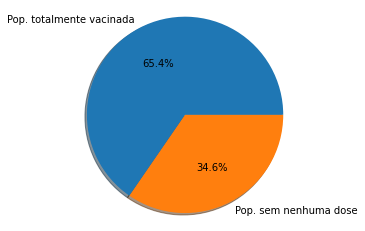

In [ ]:
import matplotlib.pyplot as plt

# Criação de variáveis auxiliares
populacao_total = 212538226
populacao_totalmente_vacinada = int(total_segunda_dose.replace(".", ""))
porcentagem_vacinada = populacao_totalmente_vacinada/populacao_total * 100

# Gráfico de pizza da população vacinada x não vacinada.
# Criação de rótulos e porcentagens.
labels = "Pop. totalmente vacinada", "Pop. sem nenhuma dose"
sizes = [porcentagem_vacinada, 100 - porcentagem_vacinada]

# Criando a representação.
fig1, ax1 = plt.subplots()

# Criando o gráfico.
ax1.pie(sizes, labels = labels, autopct = "%1.1f%%",
        shadow = True, startangle = 0)

# Tornando-o circular.
ax1.axis("equal")

plt.savefig("grafico.png")
referencia = "grafico.png"

# Definição de comportamentos do bot

In [ ]:
import logging

from telegram import Update, ForceReply
from telegram.ext import Updater, CommandHandler, MessageHandler, Filters, CallbackContext

logging.basicConfig(
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s', level=logging.INFO
)

logger = logging.getLogger(__name__)

def start(update: Update, context: CallbackContext) -> None:
  update.message.reply_text('Use os comandos para receber as informações mais recentes da covid no país.\nCaso tenha dúvidas quanto ao funcionamento do bot, use /ajuda.')

def vachoje(update: Update, context: CallbackContext) -> None:
  update.message.reply_text(f"1ª dose: {primeira_dose}\n2ª e única: {segunda_unica_dose}\n3ª dose: {terceira_dose}\nTotal de doses aplicadas hoje: {total_hoje_doses}\nÚltima atualização: {atualizacao}")

def vactotal(update: Update, context: CallbackContext) -> None:
  update.message.reply_text(f"1ª dose: {total_primeira_dose}\n2ª e única: {total_segunda_dose}\n3ª dose: {total_terceira_dose}\nTotal de doses aplicadas: {total_doses}\nÚltima atualização: {atualizacao}")
  update.message.reply_photo(photo = open(referencia, "rb"))

def obithoje(update: Update, context: CallbackContext) -> None:
  update.message.reply_text(f"Número de óbitos registrados hoje: {total_obitos_hoje}\nÚltima atualização: {atualizacao}")

def obittotal(update: Update, context: CallbackContext) -> None:
  update.message.reply_text(f"Total de óbitos: {total_obitos}\nÚltima atualização: {atualizacao}")

def ajuda(update: Update, context: CallbackContext) -> None:
  update.message.reply_text("Utilize os seguintes comandos:\n/vachoje (Saber dados da vacinação de hoje)\n/obithoje (Saber dados de óbitos de hoje)\n/vactotal (Saber dados sobre o total de pessoas vacinadas)\n/obittotal (Saber dados sobre o total de óbitos pela doença)")

def main():
  #Iniciando bot
  updater = Updater("token")
  dispatcher = updater.dispatcher

  dispatcher.add_handler(CommandHandler("start", start))
  dispatcher.add_handler(CommandHandler("vachoje", vachoje))
  dispatcher.add_handler(CommandHandler("obithoje", obithoje))
  dispatcher.add_handler(CommandHandler("vactotal", vactotal))
  dispatcher.add_handler(CommandHandler("obittotal", obittotal))
  dispatcher.add_handler(CommandHandler("ajuda", ajuda))

  updater.start_polling()

  updater.idle()

if __name__ == '__main__':
  main()

2021-12-10 17:48:31,985 - apscheduler.scheduler - INFO - Scheduler started
2021-12-10 17:49:04,518 - telegram.ext.updater - INFO - Received signal 2 (SIGINT), stopping...
2021-12-10 17:49:04,520 - apscheduler.scheduler - INFO - Scheduler has been shut down
